# Muller's Ratchet in Doomed Populations

## Parameters

* $u$, probability that an individual offspring acquires one mutation.

* $s$, deleterious effect of a mutation.

* $w_k=(1-s)^k$, absolute fitness of an individual carrying *k* mutations.

* $\mathbf{Z}_t$, the composition of the population at generation *t*.

* $Z_{t,k}$, number of individuals with *k* deleterious mutations at generation *t*.

## Fitness

In [10]:
run doomed

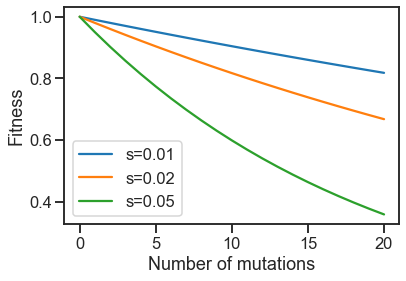

In [17]:
k = np.arange(21)
for s in [.01, .02, .05]:
    fit = [w(i, s) for i in k]
    plt.plot(k, fit, label='s={0}'.format(s))
plt.xticks([0, 5, 10, 15, 20])
plt.xlabel('Number of mutations')
plt.ylabel('Fitness')
plt.legend();

## Change in the composition of the population

In [3]:
for i in range(3):
    print(i, Eztk(List([89, 78, 67, 56]), 6, i, .06, .02))

0 78.83997189689599
1 55.983589621983654
2 33.63950407336737


In [5]:
x = List([89, 78, 67, 56, 45, 34, 23, 12])
x

ListType[int64]([89, 78, 67, 56, 45, 34, 23, 12, ...])

In [8]:
x.append(0)

In [15]:
del x[-1]

In [16]:
x

ListType[int64]([89, 78, 67, 56, 45, 34, 23, 12, ...])

In [11]:
EZt(List([89, 78, 67, 56, 45, 34, 23, 12]), 6, .06, .02)

[78.83997189689599,
 55.983589621983654,
 33.63950407336737,
 19.495830976094148,
 10.882959833410819,
 5.7371025822676645,
 2.7362851345711086,
 1.0449571845669448,
 0.09406931970077179,
 0.003900823145679342,
 8.849533155787873e-05,
 1.1395917773934133e-06,
 7.853818626970906e-09,
 2.2576097666385384e-11]

In [12]:
ENt(List([89, 78, 67, 56, 45, 34, 23, 12]), 6, .06, .02)

208.45826108880385

In [89]:
run doomed

In [2]:
u = 0.02
s = 0.06
ind_step(.5, 0, s, u)

(0, 0)

In [3]:
u = 0.02
s = 0.06
z = 100
class_step(z, 1, s, u)

(89, 1)

In [80]:
u = 0.02
s = 0.06
z = [100]
pop_step(z, s, u)

[114]

In [82]:
n, k, t, clicks, zz = sim(z, s, u)
t, clicks

(194, [192])

In [124]:
ext_times.max()

235

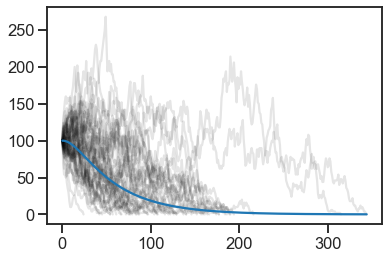

In [125]:
nreps = 50
pop_sizes, ext_times, clicks = simult(z, nreps, s, u)
for i in range(nreps):
    plt.plot(pop_sizes[:(ext_times[i]+1),i], 'k-', alpha=.1)
expected = [ENt(List(z), t, s, u) for t in range(ext_times.max()+1)]
plt.plot(expected)

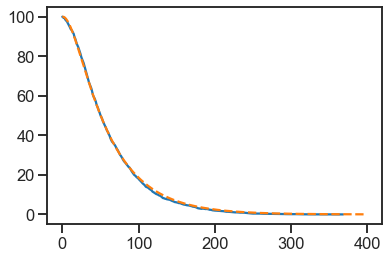

In [109]:
u = 0.02
s = 0.06
z = [100]
pop_sizes, ext_times, clicks = simult(z, 1000, s, u)
m = pop_sizes.mean(axis=1)
expected = [ENt(List(z), t, s, u) for t in range(400)]
plt.plot(m)
plt.plot(expected, '--')

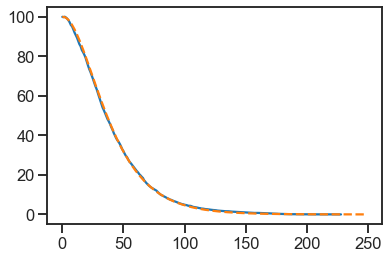

In [108]:
u = 0.04
s = 0.04
pop_sizes, ext_times, clicks = simult(z, 1000, s, u)
m = pop_sizes.mean(axis=1)
expected = [ENt(List(z), t, s, u) for t in range(250)]
plt.plot(m)
plt.plot(expected, '--')

In [103]:
[ENt(List([100]), t, u, s) for t in range(100)]

[100.0,
 100.0,
 99.88000000000001,
 99.64268512,
 99.29109789840778,
 98.82860886087937,
 98.2588864213163,
 97.58586638934757,
 96.81372134378246,
 95.94683011502512,
 94.98974760163665,
 93.94717512744302,
 92.8239315261319,
 91.62492512044614,
 90.35512674313361,
 89.01954392699997,
 87.62319637194402,
 86.17109277792989,
 84.66820911463154,
 83.11946838111197,
 81.5297218924866,
 79.90373211516138,
 78.24615705799593,
 76.56153621367372,
 74.85427803268844,
 73.12864890169396,
 71.38876358850571,
 69.63857710777275,
 67.88187795422127,
 66.1222826443728,
 64.3632315027071,
 62.607985624315184,
 60.859624943115925,
 59.121047332617195,
 57.39496866492632,
 55.683923753184494,
 53.99026810274108,
 52.31618039713209,
 50.66366564620996,
 49.03455892552262,
 47.43052963819508,
 45.85308623306442,
 44.303581315601264,
 42.78321709116034,
 41.29305108329377,
 39.83400207318008,
 38.40685620963162,
 37.012273242601495,
 35.650792836582596,
 34.32284092374815,
 33.02873606009155,
 31.7686

In [99]:
ENt(List([100]), 10, u, s)

94.98974760163665

In [74]:
zz

[[10, 1], [8], [8], [10], [12], [11, 1], [8], [6], [6], [2], []]

In [43]:
@jit
def pop_step(zz, s, u):
    '''
    Take a time step in the branching process model for a population.  Return
    a new population.

    Parameters
    ----------
    zz : list
        Histogram of number of individuals with k = 0, 1, 2, ... mutations
    s : float
        Deleterious effect of a mutation
    u : float
        Mutation rate

    Returns
    -------
    list
        New histogram
    '''
    offspring = List([])
    newzz = List([0])
    if sum(zz) == 0:
        return zz
    else:
        k = 0
        for z in zz:
            offspring.append(class_step(z, k, s, u))
            k += 1
        for i in range(len(offspring)):
            newzz[i] += offspring[i][0]
            newzz.append(offspring[i][1])
        newzz = trim(newzz)
        return newzz

In [44]:
u = 0.02
s = 0.06
z = List([100])
pop_step(z, s, u)

/var/folders/90/_pclxfxx04x3n35rh86rsd6w0000gn/T/ipykernel_63056/3823884761.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "pop_step" failed type inference due to: Untyped global name 'sum': Cannot determine Numba type of <class 'builtin_function_or_method'>

File "../../../../../../var/folders/90/_pclxfxx04x3n35rh86rsd6w0000gn/T/ipykernel_63056/3823884761.py", line 23:
<source missing, REPL/exec in use?>

  @jit
/var/folders/90/_pclxfxx04x3n35rh86rsd6w0000gn/T/ipykernel_63056/3823884761.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "pop_step" failed type inference due to: Untyped global name 'sum': Cannot determine Numba type of <class 'builtin_function_or_method'>

File "../../../../../../var/folders/90/_pclxfxx04x3n35rh86rsd6w0000gn/T/ipykernel_63056/3823884761.py", line 23:
<source missing, REPL/exec in use?>

  @jit
/Users/rbazev/anaconda3/envs/py37/lib/python3

TypeError: invalid operation on untyped list

In [ ]:
pop_sizes, mutations, ext_times = simult([n0], 10000, s, u, K=np.infty)

In [31]:
phi_k([0,1,2,3], 2, .06, .02)

2.3609207199999998

In [34]:
phi_k([0,1,2,3], 3, .06, .02)

4.322336

In [35]:
phi([0,0,0,0,0,0], .06, .02)

[0.5, 0.53, 0.5582, 0.584708, 0.60962552, 0.6330479888]

In [36]:
phi([0.5, 0.53, 0.5582, 0.584708, 0.60962552, 0.6330479888], .06, .02)

[0.62530018,
 0.6623041343051201,
 0.6961208552502438,
 0.7269315863176066,
 0.7549286210155779,
 0.7801039177975104]

In [38]:
px([1000], 200, 10, .06, .02)

0.4615055653545099

In [39]:
ET([1000], 50, .06, .02, 1e-8)

215.6014812186036

In [41]:
ET([1000, 20], 50, .06, .02, 1e-8)

215.60163042162793

In [299]:
x = rnd.multinomial(1, [.3, .1, .2, .4], size=10000)
x.sum(axis=0)

array([3046,  992, 2015, 3947])

In [302]:
x = rnd.multinomial(10000, [.3, .1, .2, .4], size=1)
x

array([[3043,  956, 2011, 3990]])

In [142]:
x = rnd.multinomial(1, [.2, .2, .2, .4], size=1)
x, x.argmax()

(array([[1, 0, 0, 0]]), 0)

In [144]:
x = rnd.multinomial(1, [.2, .2, .2, .4], size=)


(array([[0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]]),
 3)

In [303]:
def type_offspring(n, k, s, u):
    if n > 0:
        v = 1 - u
        # probabilities of different outcomes
        p = w(k, s) * np.array([(v ** 2) / 2, u * v, (u ** 2) / 2])
        p = np.append(p, 1 - p.sum())
        outcomes = rnd.multinomial(n, p)
        # offspring
        unmutated = 2 * outcomes[0] + outcomes[1]
        mutant = outcomes[1] + 2 * outcomes[2]
        return unmutated, mutant
    else:
        return 0, 0

def next_gen(Z, s, u):
    ntypes = len(Z)
    next_Z = [0] * (ntypes + 1)
    for k in range(ntypes):
        if Z[k] > 0:
            offspring = type_offspring(Z[k], k, s, u)
            next_Z[k] += offspring[0]
            next_Z[k+1] += offspring[1]
    return trim(next_Z)

def to_extinction(Z, s, u):
    t = 0
    N = sum(Z)
    Z_history = [Z]
    N_history = [N]
    while N > 0:
        t += 1
        Z = next_gen(Z, s, u)
        N = sum(Z)
        Z_history.append(Z)
        N_history.append(N)
    return N_history, Z_history, t

In [295]:
type_offspring(1000, 0, .02, .04)

(934, 32)

In [273]:
next_gen([100, 100], .02, .04)

[109, 111, 6]

In [275]:
N, Z, t = to_extinction([1, 0], .02, .04)
t

13

In [276]:
Z

[[1, 0],
 [2, 0],
 [4, 0],
 [6, 0],
 [5, 1],
 [5, 1],
 [6, 0],
 [5, 1],
 [2, 0],
 [4, 0],
 [4, 0],
 [4, 0],
 [2, 0],
 [0, 0]]

In [267]:
N

[10, 8, 8, 4, 6, 2, 2, 2, 4, 4, 6, 8, 2, 0]

In [269]:
N[13]

0

In [317]:
%%time
n, k, t, clicks, zz = sim([100000, 100000, 100000], .03, .002)
t

CPU times: user 1.09 s, sys: 6.54 ms, total: 1.1 s
Wall time: 1.1 s


3529

In [314]:
%%time
N, Z, t = to_extinction([100000, 100000, 100000], .03, .002)
t

CPU times: user 332 ms, sys: 8.25 ms, total: 340 ms
Wall time: 338 ms


3486

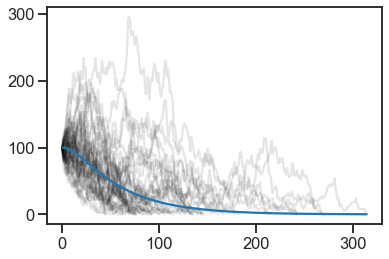

In [319]:
nreps = 50
s = 0.06
u = 0.02
tt = []
for i in range(nreps):
    N, Z, t = to_extinction([100], s, u)
    tt.append(t)
    plt.plot(N, 'k-', alpha=.1)
expected = [ENt(List(z), t, s, u) for t in range(max(tt)+1)]
plt.plot(expected)